In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


Load the dataset

In [3]:
vg_df = pd.read_csv('Churn_Modelling.csv')

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


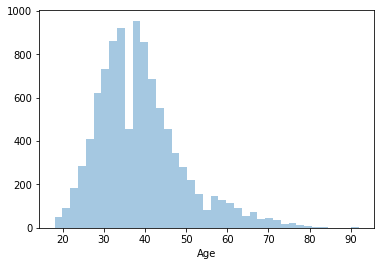

In [5]:
sns.distplot(vg_df.Age.dropna(), kde=False, bins = 39);

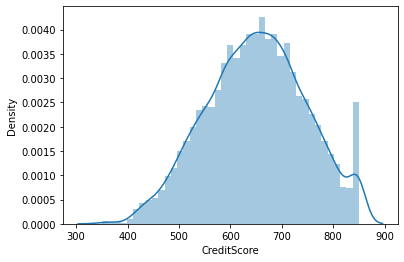

In [6]:
sns.distplot(vg_df.CreditScore.dropna());

Bivariate Analysis

Text(0, 0.5, 'NumOfProducts')

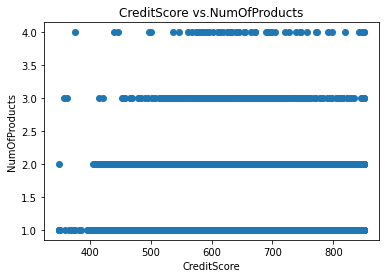

In [8]:
plt.scatter(vg_df.CreditScore,vg_df.NumOfProducts)
plt.title('CreditScore vs.NumOfProducts')
plt.xlabel('CreditScore')
plt.ylabel('NumOfProducts')

In [12]:
vg_df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [13]:
reviews = pd.read_csv("Churn_Modelling.csv", index_col=0)
reviews.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


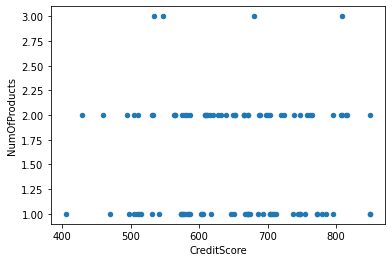

In [15]:
reviews[reviews['NumOfProducts']<100].sample(100).plot.scatter(x='CreditScore', y='NumOfProducts')


In [16]:
wine_counts = pd.read_csv("Churn_Modelling.csv",index_col=0)

In [17]:
wine_counts.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Multivariate Analysis

In [18]:
from pydoc import help 
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)
import os

In [21]:
data=pd.read_csv("Churn_Modelling.csv")
data.columns = ["S"+str(i) for i in range(1, len(data.columns)+1)]
X = data.loc[:, "S2":] # independent variables data
y = data.S1 # dependednt variable data
data

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
data.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


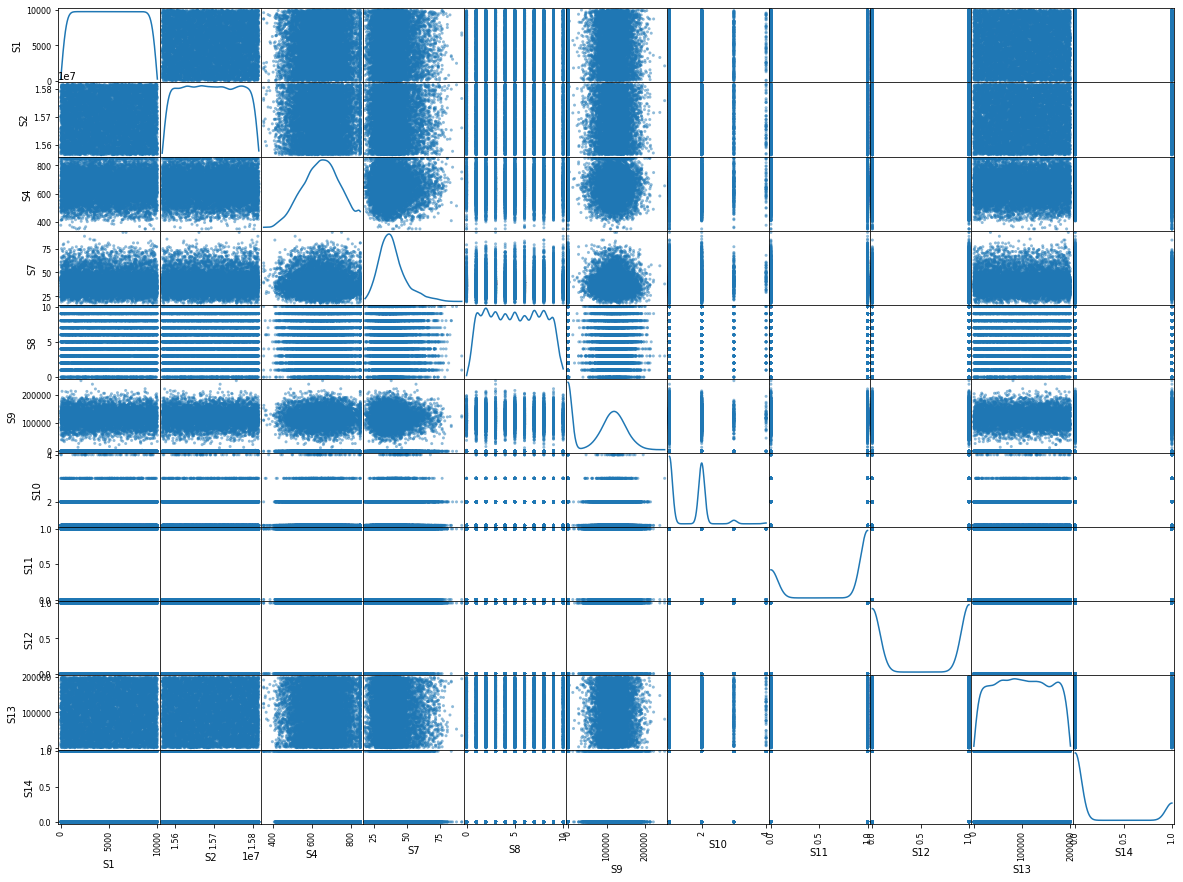

In [28]:
pd.plotting.scatter_matrix(data.loc[:, "S1":"S14"], diagonal="kde",figsize=(20,15))
plt.show()

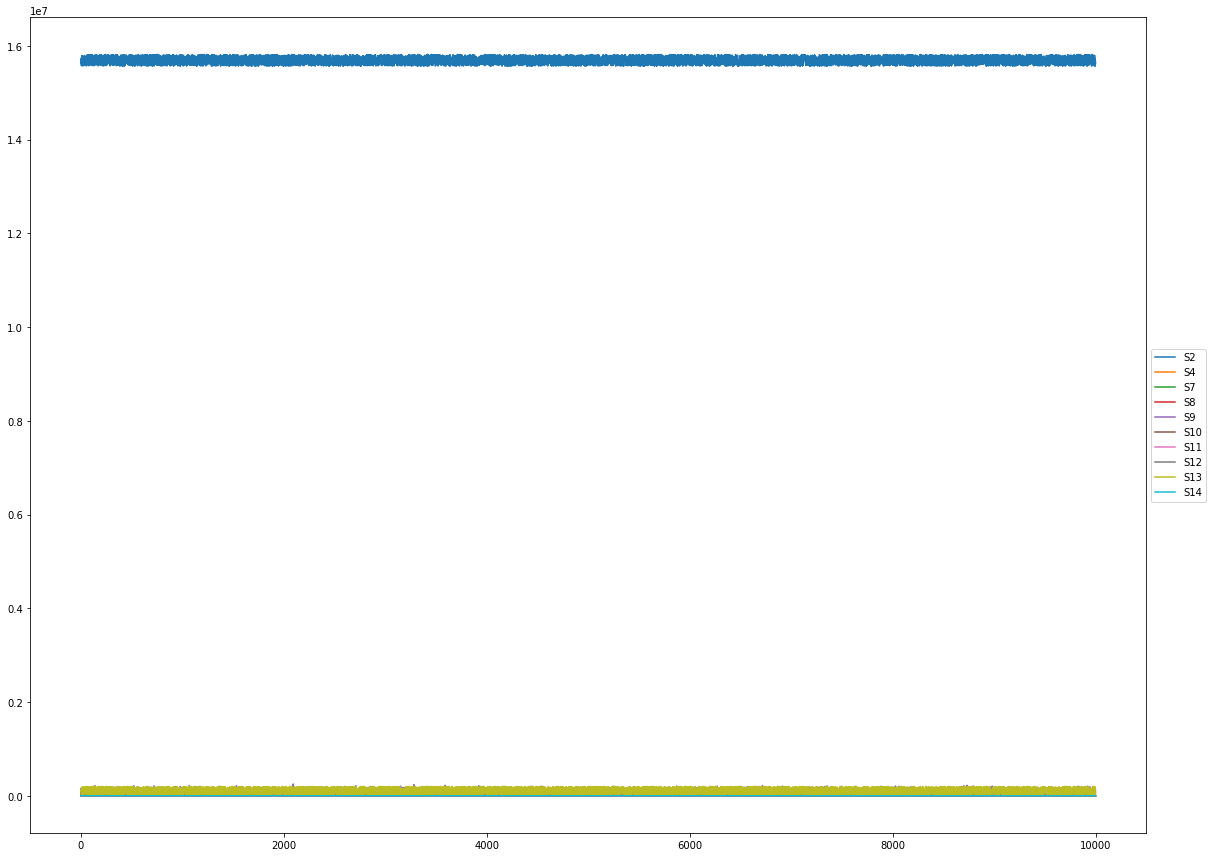

In [31]:
ax = data[["S2","S3","S4","S5","S6","S7","S8","S9","S10","S11","S12","S13","S14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Descriptive ststistics

In [32]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [34]:
data = sns.load_dataset("tips")

In [35]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Measure of central tendency

In [37]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [38]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [39]:
data.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

In [40]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    17.795
tip            2.900
size           2.000
dtype: float64

In [41]:
data.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


In [42]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

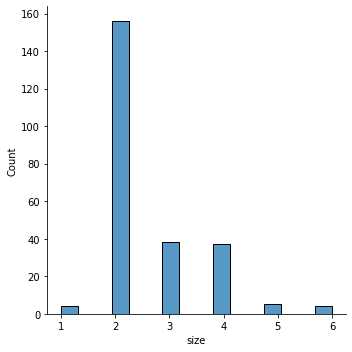

In [43]:
print(sns.displot(data['size']))

(None, None)

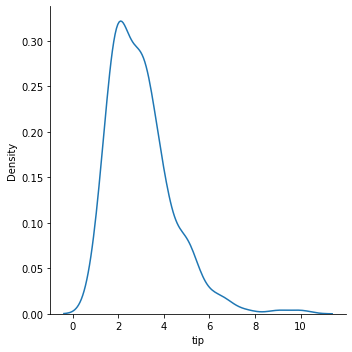

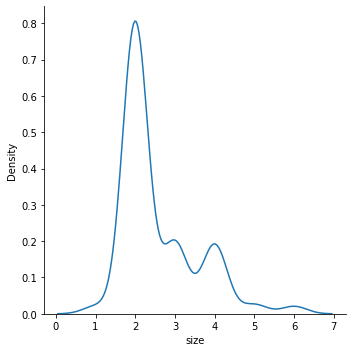

In [46]:
print(sns.displot(data['tip'],kind='kde')) , print(sns.displot(data['size'],kind='kde'))

In [47]:
data.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    50.81
tip           10.00
size           6.00
dtype: float64

In [48]:
data['size'].max()

6

In [49]:
data['size'].min()

1

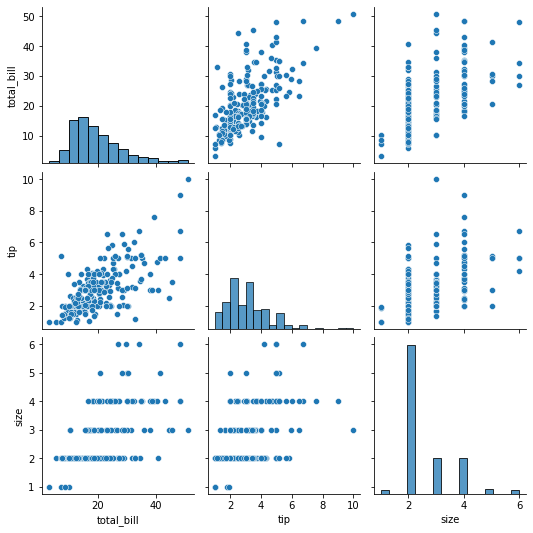

In [50]:
sns.pairplot(data)

IQR - Inter Quartile Range

In [51]:
quantile = data.quantile(q = [0.75,0.25])

In [52]:
quantile

,total_bill,tip,size
0.75,24.1275,3.5625,3.0
0.25,13.3475,2.0000,2.0


In [53]:
quantile.iloc[0]

total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64

In [54]:
IQR = quantile.iloc[0]-quantile.iloc[1]

In [55]:
Upper_extreme = quantile.iloc[0] + (1.5*IQR)
Upper_extreme

total_bill    40.29750
tip            5.90625
size           4.50000
dtype: float64

In [56]:
lower_extreme = quantile.iloc[1] - (1.5*IQR)
lower_extreme

total_bill   -2.82250
tip          -0.34375
size          0.50000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


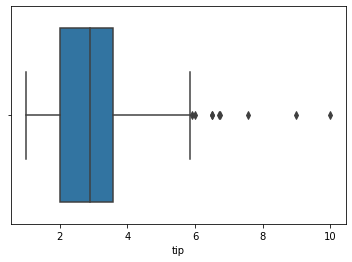

In [57]:
sns.boxplot(data['tip'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


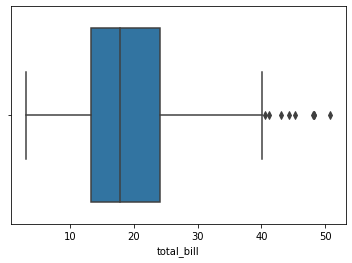

In [58]:
sns.boxplot(data.total_bill)

Population and sample

In [59]:
import cv2

In [60]:
N = 10000
mu = 10
std = 2

In [61]:
population_df = np.random.normal(mu,std,N)
population_df

array([ 8.9538857 , 11.05381024,  9.69863122, ...,  8.84702492,
       10.44519401,  7.48888046])

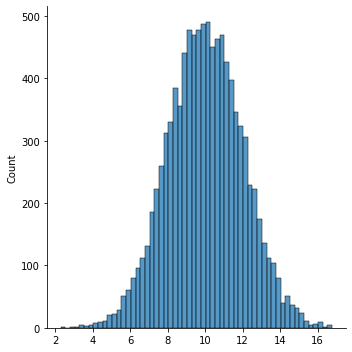

In [62]:
sns.displot(population_df)

In [63]:
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)
randomSample = random_sampling(population_df, 1000)
randomSample

array([ 8.57691995,  9.36322155, 10.75721946, 10.25699751,  9.14010766,
        8.84985324,  9.01741803,  6.95638355, 10.36063783, 10.30234296,
        7.83307437, 10.9261142 ,  9.95665324,  5.95781812,  9.486896  ,
        8.54862368,  9.90817821,  7.24737885, 10.79051204, 10.26504193,
        6.90055934, 12.11367457,  9.2139431 , 11.01451146,  7.3952976 ,
       11.32149082,  7.54615223, 12.44165166,  8.89209703,  7.60374361,
       11.67747064, 10.52847621, 12.19157537, 10.11962697, 12.27045062,
       12.8937925 , 12.17360722, 12.74745474,  6.11442707,  8.87960527,
        4.96529106, 11.41319669,  9.39313076,  7.48508179, 10.99412729,
       10.98985021,  9.46524436, 11.34069124,  7.95753315,  9.09093324,
        6.66994027,  9.13116197, 10.27881312,  8.37514248, 12.66074327,
        9.91473178, 10.08364631,  7.5595407 ,  9.50169912,  8.39725417,
        9.32919306, 11.06126105,  9.9766033 ,  8.2878052 ,  9.7641231 ,
        9.07423536,  9.2622153 ,  9.19884977,  7.46683   , 11.75

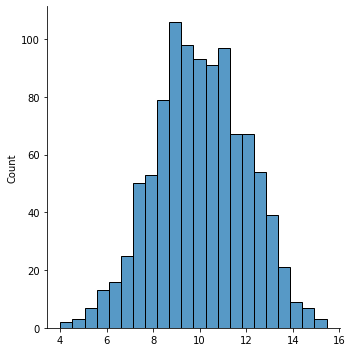

In [64]:
sns.displot(randomSample)

In [65]:
data.var()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64

In [66]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

In [67]:
data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [69]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Scaling Methods

In [70]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [71]:
x = data[['total_bill','tip']]

In [72]:
x.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [74]:
import sklearn

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scale =StandardScaler()

In [77]:
st_scale = scale.fit_transform(x)

In [78]:
st_scale

array([[-0.31471131, -1.43994695],
       [-1.06323531, -0.96920534],
       [ 0.1377799 ,  0.36335554],
       [ 0.4383151 ,  0.22575414],
       [ 0.5407447 ,  0.4430195 ],
       [ 0.61953671,  1.23965916],
       [-1.23995452, -0.72297126],
       [ 0.79850711,  0.08815275],
       [-0.53420331, -0.75193998],
       [-0.56346891,  0.16781671],
       [-1.07111451, -0.93299445],
       [ 1.74175992,  1.44968234],
       [-0.49143051, -1.03438495],
       [-0.1526249 ,  0.0012466 ],
       [-0.55784091,  0.01573096],
       [ 0.2019391 ,  0.66752704],
       [-1.06436091, -0.96196316],
       [-0.39350331,  0.51544129],
       [-0.31696251,  0.36335554],
       [ 0.0972583 ,  0.25472286],
       [-0.2100305 ,  0.7834019 ],
       [ 0.0567367 , -0.17980786],
       [-0.45203451, -0.55640115],
       [ 2.21000952,  3.31816444],
       [ 0.0038335 ,  0.13160582],
       [-0.2224121 , -0.47673719],
       [-0.72217851, -0.72297126],
       [-0.79871931, -0.72297126],
       [ 0.2154463 ,

Normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
norm = min_max.fit_transform(x)

In [81]:
norm

array([[0.29157939, 0.00111111],
       [0.1522832 , 0.07333333],
       [0.3757855 , 0.27777778],
       [0.43171345, 0.25666667],
       [0.45077503, 0.29      ],
       [0.46543779, 0.41222222],
       [0.11939673, 0.11111111],
       [0.49874319, 0.23555556],
       [0.25073314, 0.10666667],
       [0.24528697, 0.24777778],
       [0.15081693, 0.07888889],
       [0.67427734, 0.44444444],
       [0.25869292, 0.06333333],
       [0.32174277, 0.22222222],
       [0.24633431, 0.22444444],
       [0.38772518, 0.32444444],
       [0.15207373, 0.07444444],
       [0.27691663, 0.30111111],
       [0.29116045, 0.27777778],
       [0.36824466, 0.26111111],
       [0.31105991, 0.34222222],
       [0.36070381, 0.19444444],
       [0.2660243 , 0.13666667],
       [0.761416  , 0.73111111],
       [0.35085882, 0.24222222],
       [0.30875576, 0.14888889],
       [0.21575199, 0.11111111],
       [0.20150817, 0.11111111],
       [0.39023879, 0.36666667],
       [0.34729786, 0.22222222],
       [0.

 Robust Scaler

In [82]:
from sklearn.preprocessing import RobustScaler

In [83]:
Rscale = RobustScaler()

In [84]:
RS = Rscale.fit_transform(x)

In [85]:
RS

array([[-0.07467532, -1.2096    ],
       [-0.69155844, -0.7936    ],
       [ 0.29823748,  0.384     ],
       [ 0.54591837,  0.2624    ],
       [ 0.63033395,  0.4544    ],
       [ 0.69526902,  1.1584    ],
       [-0.83719852, -0.576     ],
       [ 0.84276438,  0.1408    ],
       [-0.25556586, -0.6016    ],
       [-0.2796846 ,  0.2112    ],
       [-0.69805195, -0.7616    ],
       [ 1.62012987,  1.344     ],
       [-0.2203154 , -0.8512    ],
       [ 0.05890538,  0.064     ],
       [-0.27504638,  0.0768    ],
       [ 0.35111317,  0.6528    ],
       [-0.69248609, -0.7872    ],
       [-0.13961039,  0.5184    ],
       [-0.07653061,  0.384     ],
       [ 0.2648423 ,  0.288     ],
       [ 0.01159555,  0.7552    ],
       [ 0.23144712, -0.096     ],
       [-0.18784787, -0.4288    ],
       [ 2.00602968,  2.9952    ],
       [ 0.18784787,  0.1792    ],
       [ 0.00139147, -0.3584    ],
       [-0.41048237, -0.576     ],
       [-0.47356215, -0.576     ],
       [ 0.3622449 ,

Distributions

In [86]:
x = np.random.rand(100000)

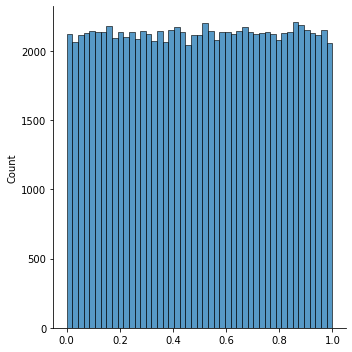

In [87]:
sns.displot(x)  # uniform distribution

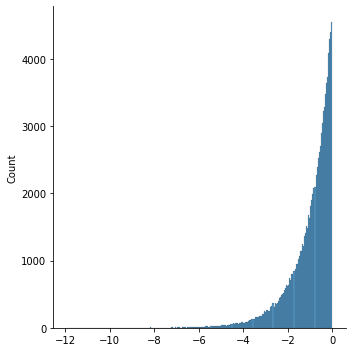

In [88]:
sns.displot(np.log(x)) 

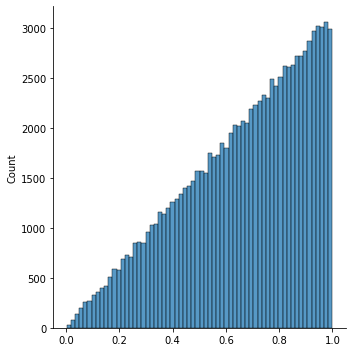

In [89]:
sns.displot(np.sqrt(x))

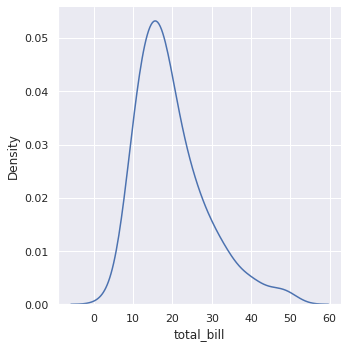

In [90]:
sns.set_theme()
sns.displot(data['total_bill'],kind='kde')

Central Limit Theorem

In [174]:
np.mean(np.random.uniform(0,1,size=100))

0.5301612793024467

In [186]:
sample = lambda:np.mean(np.random.uniform(0,1,size=100))
x = [sample() for i in range(1000)]

(array([ 2.,  3.,  1.,  0.,  2.,  3.,  5.,  7.,  7., 13.,  7., 13., 13.,
        10., 15., 25., 17., 24., 23., 35., 45., 36., 37., 48., 47., 30.,
        59., 42., 40., 35., 47., 43., 32., 35., 33., 32., 33., 25., 21.,
        12.,  8.,  8.,  5.,  9.,  3.,  2.,  0.,  2.,  3.,  3.]),
 array([0.41172192, 0.41510588, 0.41848984, 0.4218738 , 0.42525776,
        0.42864173, 0.43202569, 0.43540965, 0.43879361, 0.44217757,
        0.44556153, 0.4489455 , 0.45232946, 0.45571342, 0.45909738,
        0.46248134, 0.46586531, 0.46924927, 0.47263323, 0.47601719,
        0.47940115, 0.48278511, 0.48616908, 0.48955304, 0.492937  ,
        0.49632096, 0.49970492, 0.50308889, 0.50647285, 0.50985681,
        0.51324077, 0.51662473, 0.52000869, 0.52339266, 0.52677662,
        0.53016058, 0.53354454, 0.5369285 , 0.54031246, 0.54369643,
        0.54708039, 0.55046435, 0.55384831, 0.55723227, 0.56061624,
        0.5640002 , 0.56738416, 0.57076812, 0.57415208, 0.57753604,
        0.58092001]),
 <a list of 50

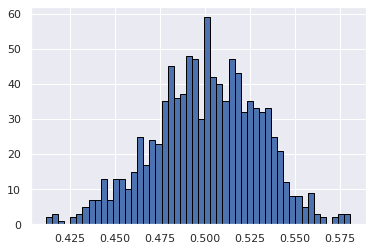

In [187]:

plt.hist(x,bins=50,edgecolor = "black")

In [188]:
import os

In [198]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [199]:
y = data['LIMIT_BAL']
x = data.drop(columns=['LIMIT_BAL','EDUCATION'],axis=1)

In [200]:
x['BILL_AMT2'].fillna(x['BILL_AMT2'].mean(),inplace = True)

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
Dtree = DecisionTreeClassifier()

In [203]:
Dtree.fit(x,y)

DecisionTreeClassifier()

In [204]:
pred = Dtree.predict(x)

In [196]:
from sklearn import metrics

In [205]:
print(metrics.confusion_matrix(y,pred))

[[ 493    0    0 ...    0    0    0]
 [   0    2    0 ...    0    0    0]
 [   0    0 1976 ...    0    0    0]
 ...
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    0    2    0]
 [   0    0    0 ...    0    0    1]]
